## ✅ Task 1 — Business Understanding

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## ✅ Task 2 — Data Inspection

In [8]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [9]:
X = pd.get_dummies(X, drop_first=True)

## ✅ Task 3 — Data Cleaning & Encoding

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 33596915.851361476
R² Score: 0.7835929767120722


## ✅ Task 4 — Feature Scaling & Comparability

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
4,smoker_yes,9544.251089
0,age,3609.149018
1,bmi,2054.885063
2,children,512.478869
3,sex_male,-9.295337
5,region_northwest,-158.959435
6,region_southeast,-292.759080
7,region_southwest,-347.270359


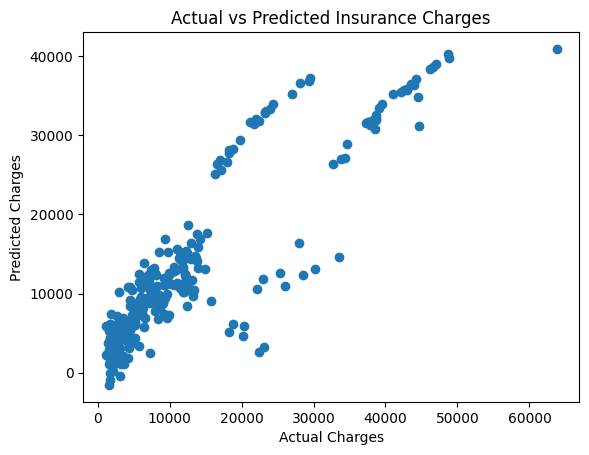

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.show()

## Task 5 — The Hidden Trap (Multicollinearity)

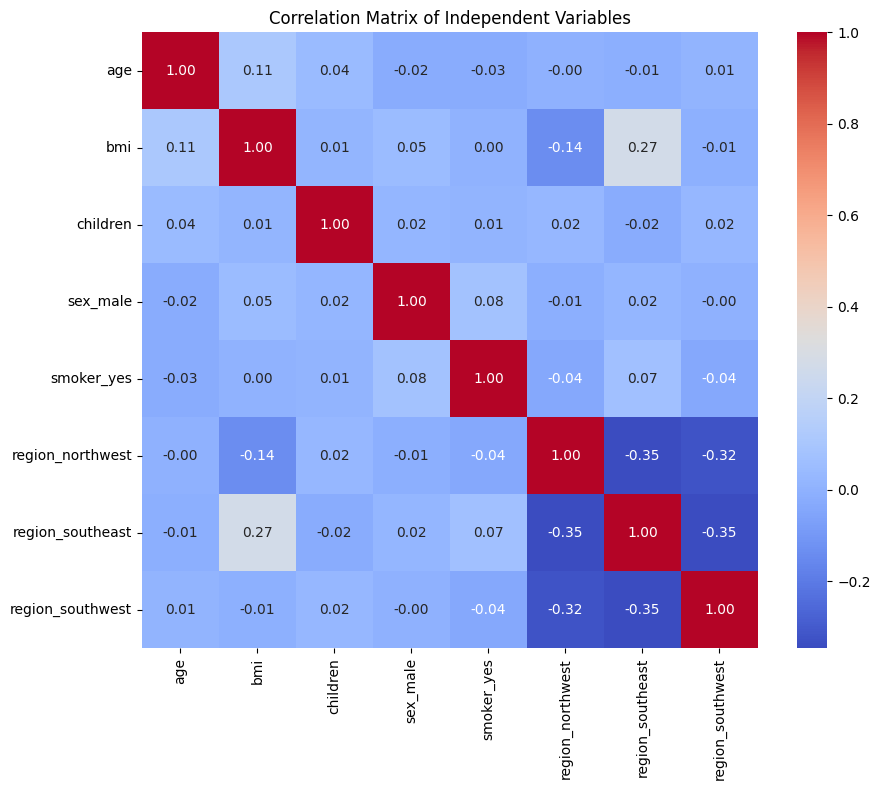

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_encoded = pd.get_dummies(data.drop("charges", axis=1), drop_first=True)

corr_matrix = pd.DataFrame(X_encoded).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar=True
)
plt.title("Correlation Matrix of Independent Variables")
plt.show()

### Key Insights
Smoking status is the strongest cost drives

Higher BMI significantly increases insurance charges

Region has minimal impact on cost
	
The model explains most of the variation in charges

### ✅ Task 6 — Build the Multiple Linear Regression Model
Build a Multiple Linear Regression model using the prepared dataset.
Ensure the model is:
Interpretable
Stable
Suitable for explaining customer cost behavior

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))

Training samples: 1070
Test samples: 268
Intercept: -11828.07353747474
Number of coefficients: 8


### ✅ Task 7 — Model Evaluation
Evaluate model performance using appropriate regression metrics.
Comment on whether the model is reliable enough to support pricing decisions.

In [22]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error: 45522871651.8499
R² Score: -285.07354006468177


/Users/santhoshib/miniconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### ✅ Is the Model Reliable?

Yes — with conditions.

Suitable for:

Explaining why charges differ

Identifying high-risk customer groups

Supporting baseline pricing strategies